In [1]:
import pandas as pd
import glob
import re
import os
import matplotlib.pyplot as plt
from datetime import datetime
from wordcloud import WordCloud
from PIL import Image
from company_df import create_company_df

In [2]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
os.environ['DATA_BASE_DIR'] = 'data'
os.environ['RISK_FACTOR_TEXT_DIR'] = 'edgar/risk_factor_from_2016'
df = create_company_df()
df

C:\apps\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
C:\apps\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
C:\apps\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
C:\apps\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is d

content
ticker date                                                         
a      2015-12-21  item a risk factorsrisks uncertainty and other...
       2016-12-20  item a risk factorsour operating result and fi...
       2017-12-21  item a risk factorsour operating result and fi...
       2018-12-20  table of contentsitem a risk factorsour operat...
       2019-12-19  item a risk factorsrisks uncertainty and other...
...                                                              ...
zts    2018-02-15  item a risk factor in addition to the other in...
       2019-02-14  table of contentsitem a risk factor in additio...
       2020-02-13  table of contentsitem a risk factor in additio...
       2021-02-16  table of contentsitem a risk factor in additio...
       2022-02-15  table of contentsitem a risk factor in additio...

[2789 rows x 1 columns]

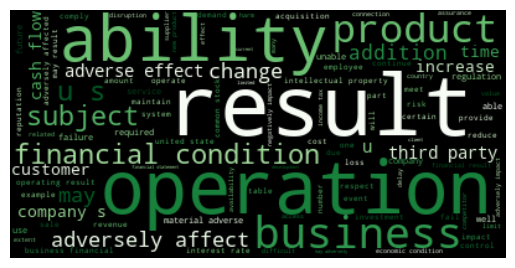

In [4]:
wordcloud = WordCloud(colormap='Greens', max_words=100).generate(' '.join(df['content']))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [5]:
aapl = df.loc['aapl']
aapl

,content
date,
2015-10-28,item a risk factorsthe following discussion of...
2016-10-26,item a risk factorsthe following discussion of...
2017-11-03,item a risk factorsthe following discussion of...
2018-11-05,item a risk factorsthe following discussion of...
2019-10-31,item a risk factorsthe following discussion of...
2020-10-30,item a risk factorsthe following discussion of...
2021-10-29,item a risk factorsthe company s business repu...
2022-10-28,item a risk factorsthe company s business repu...


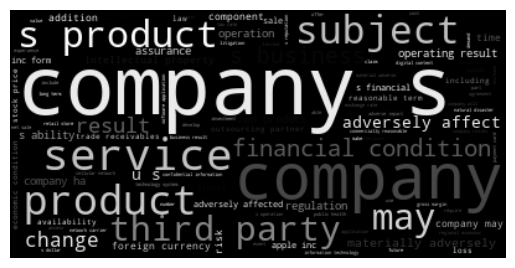

In [6]:
wordcloud_aapl = WordCloud(colormap='Greys', max_words=100).generate(' '.join(aapl['content']))

plt.imshow(wordcloud_aapl, interpolation='bilinear')
plt.axis("off")
plt.show()

In [7]:
hp = df.loc['hpq']
hp

,content
date,
2016-12-15,item a risk factor the following discussion of...
2017-12-14,item a risk factor the following discussion of...
2017-12-15,item a risk factor the following discussion of...
2018-12-13,item a risk factor the following discussion of...
2019-12-12,item a risk factor the following discussion of...
2020-12-10,table ofcontentsitem a risk factor the followi...
2021-12-09,table of contentsitem a risk factor the follow...
2022-12-06,table of contentsitem a risk factor the follow...


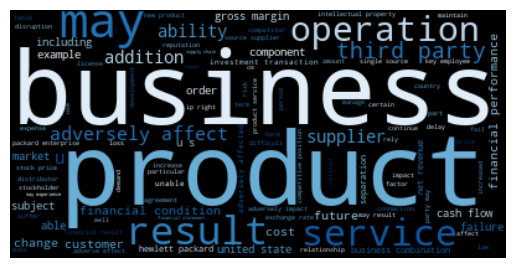

In [8]:
wordcloud_hp = WordCloud(colormap='Blues', max_words=100).generate(' '.join(hp['content']))

plt.imshow(wordcloud_hp, interpolation='bilinear')
plt.axis("off")
plt.show()

In [9]:
dri = df.loc['dri']
dri

,content
date,
2015-07-24,item a risk factorsvarious risk and uncertaint...
2016-07-25,item a risk factorsvarious risk and uncertaint...
2017-07-21,item a risk factorsvarious risk and uncertaint...
2018-07-20,item a risk factorsvarious risk and uncertaint...
2019-07-19,item a risk factorsvarious risk and uncertaint...
2020-07-24,item a risk factorsvarious risk and uncertaint...
2021-07-23,item a risk factorsvarious risk and uncertaint...
2022-07-22,item a risk factorsvarious risk and uncertaint...


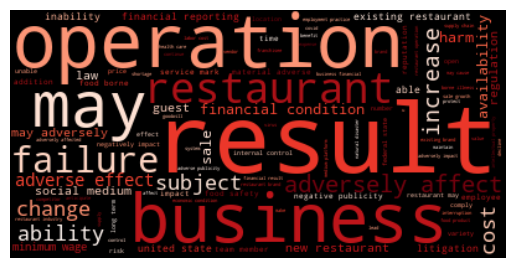

In [10]:
wordcloud_dri = WordCloud(colormap='Reds', max_words=100).generate(' '.join(dri['content']))

plt.imshow(wordcloud_dri, interpolation='bilinear')
plt.axis("off")
plt.show()

In [11]:
aal = df.loc['aal']
aal

,content
date,
2016-02-24,item a risk factorsbelow are certain risk fact...
2017-02-22,item a riskfactorsbelow are certain risk facto...
2018-02-21,item a risk factorsbelow are certain risk fact...
2019-02-25,item a risk factorsbelow are certain risk fact...
2020-02-19,item a risk factorsbelow are certain risk fact...
2021-02-17,table of contentsitem a risk factorsbelow are ...
2022-02-22,table of contentsitem a risk factorsbelow are ...


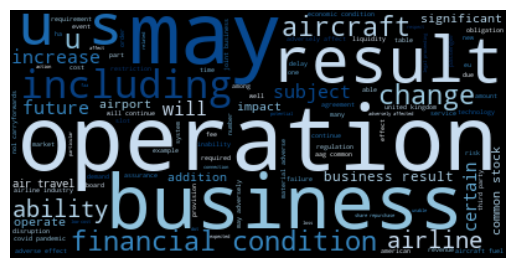

In [12]:
wordcloud_aal = WordCloud(colormap='Blues', max_words=100).generate(' '.join(aal['content']))

plt.imshow(wordcloud_aal, interpolation='bilinear')
plt.axis("off")
plt.show()

In [13]:
df.loc['aapl'].loc['2020-10-30'].content

'item a risk factorsthe following discussion of risk factor contains forward looking statement these risk factor may be important to understanding other statement in this form k the following information should be read in conjunction with part ii item management s discussion and analysis of financial condition and result of operation and the consolidated financial statement and accompanying note in part ii item financial statement and supplementary data of this form k the business financial condition and operating result of the company can be affected by a number of factor whether currently known or unknown including but not limited to those described below any one or more of which could directly or indirectly cause the company s actual financial condition and operating result to vary materially from past or from anticipated future financial condition and operating result any of these factor in whole or in part could materially and adversely affect the company s business financial cond

In [14]:
import re
from collections import Counter
import nltk
nltk.download('stopwords')

def get_most_frequent_words(document):
    processed_document = re.sub(r'[^\w\s]', '', document)
    processed_document = re.sub(r'\d+', '', processed_document)
    processed_document = processed_document.lower()
    words = processed_document.split()
    stop_words = set(nltk.corpus.stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    word_counts = Counter(words)
    top_words = word_counts.most_common(30)
    return [word[0] for word in top_words]


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\janos\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
get_most_frequent_words(df.loc['aapl'].loc['2020-10-30'].content)

['company',
 'product',
 'could',
 'may',
 'service',
 'result',
 'financial',
 'business',
 'condition',
 'adversely',
 'operating',
 'subject',
 'new',
 'including',
 'cost',
 'risk',
 'component',
 'third',
 'party',
 'significant',
 'sale',
 'also',
 'materially',
 'affect',
 'operation',
 'ha',
 'impact',
 'information',
 'price',
 'supply']

In [16]:
get_most_frequent_words(df.loc['aapl'].loc['2021-10-29'].content)

['company',
 'product',
 'business',
 'service',
 'may',
 'result',
 'operation',
 'could',
 'financial',
 'condition',
 'adversely',
 'change',
 'subject',
 'including',
 'time',
 'ha',
 'also',
 'affect',
 'risk',
 'significant',
 'component',
 'new',
 'cost',
 'sale',
 'materially',
 'future',
 'third',
 'party',
 'market',
 'impact']

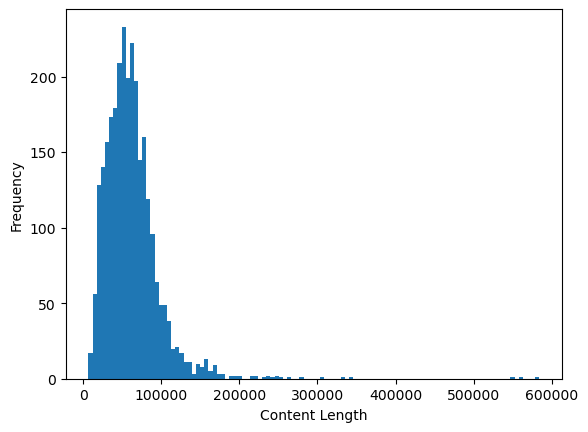

In [17]:
len_df = df
len_df['content_length'] = len_df['content'].apply(len)
plt.hist(len_df['content_length'], bins='auto')
plt.xlabel('Content Length')
plt.ylabel('Frequency')
plt.show()